# Segundo Examen Parcial
### Estimación Óptima 

### Estudiantes:
- Clara Paola Aguilar Casillas

- Samantha Sánchez Tinoco

- Priscila Cervantes Ramírez

- Rafael Takata García

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

Importamos los datos e información básica sobre estos:

In [113]:
df = pd.read_csv('data/datos_gente.csv')
df.head()

,altura,ancho,pie
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   altura  18 non-null     int64  
 1   ancho   18 non-null     int64  
 2   pie     18 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 564.0 bytes


In [115]:
df.describe()

,altura,ancho,pie
count,18.000000,18.000000,18.000000
mean,167.111111,45.222222,25.277778
std,10.208929,6.664706,2.170811
min,150.000000,38.000000,22.000000
25%,159.750000,40.000000,24.000000
50%,165.500000,44.000000,24.500000
75%,172.750000,48.750000,27.375000
max,187.000000,61.000000,29.000000


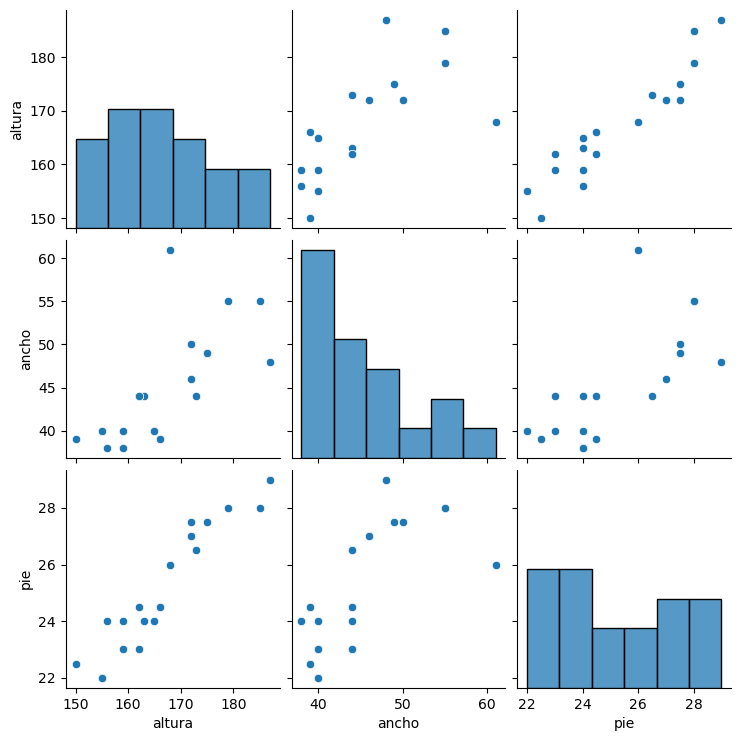

In [116]:
sns.pairplot(df)

<Axes: >

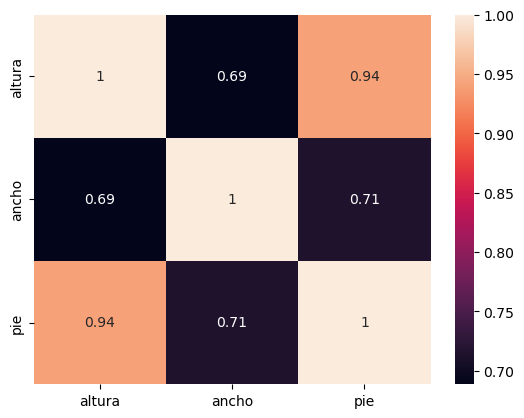

In [117]:
sns.heatmap(df.corr(), annot=True)

Después de un muy básico analisis inicial podemos ver que:

- Tenemos 18 entradas
- No hay datos faltantes
- Dos variables son de tipo `Int` y una `Float`
- Son relaciones lineales, altamente correlacionadas


---

Ahora empezaremos con la separación de los datos para nuestro modelo.

In [118]:
X = df[['ancho', 'pie']]
y = df['altura']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este caso, nosotros hemos propuesto tres modelos iniciales.

- Una Regresión lineal sin regularización

- Ridge

- Lasso

In [119]:
#Regresión lineal
#Entrenamiento
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicción
y_test_pred = lr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lr.coef_[0]}")
print(f"Intercepción: {lr.intercept_}")

Error cuadrático medio en prueba: 11.6061
R² en prueba: 0.8425
Pendiente: -0.0031472081218277977
Intercepción: 54.28434702353481


In [120]:
#Ridge
#Entrenamiento
ridge = Ridge()
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.3509
R² en prueba: 0.8459
Pendiente: 0.024043647645113467
Intercepción: 56.545484126913365


In [121]:
#Lasso
#Entrenamiento
lasso = Lasso()
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3108
R² en prueba: 0.8465
Pendiente: 0.03718503995685833
Intercepción: 60.24261755999828


Obtuvimos resultados muy similares en primera instancia, veamos si a través del tuneo de híperparametros obtenemos mejores resultados:

---
Ridge

In [122]:
#Definimos el espacio de busqueda
alphas = np.logspace(0, 10, 100)

#Parametros y busqueda
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


Veamos los resultados con el alpha optimizado a través del grid search:

In [123]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)

#Predicción
y_test_pred = ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {ridge.coef_[0]}")
print(f"Intercepción: {ridge.intercept_}")

Error cuadrático medio en prueba: 11.2384
R² en prueba: 0.8474
Pendiente: 0.03929014437173918
Intercepción: 57.818821907544816


Los resultados no cambian mucho pero, si obtenemos mejores resultados en la prueba y el testing.

Lasso

In [124]:
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Mejor alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor alpha encontrado: {best_alpha}")

Mejor alpha encontrado: 1.5922827933410924


In [125]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

#Predicción
y_test_pred = lasso.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

#Resultados
print(f"Error cuadrático medio en prueba: {mse_test:.4f}")
print(f"R² en prueba: {r2_test:.4f}")

print(f"Pendiente: {lasso.coef_[0]}")
print(f"Intercepción: {lasso.intercept_}")

Error cuadrático medio en prueba: 11.3785
R² en prueba: 0.8455
Pendiente: 0.06099087779669846
Intercepción: 63.7708782039431


### Evaluación

Después del fine-tuning, podemos observar que el modelo que nos da mejores resultados en la prueba es `Ridge` después de que realizaramos la optimización.

1. Realiza la gráfica de tu modelo con un scatterplot de los datos incluyendo el valor de R2 y RMSE.

    a ¿Por qué seleccionaste ese modelo?
    
    b. ¿Utilizaste alguna regularización?